I analyze the distribution of horse-kick deaths in the Prussian army.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

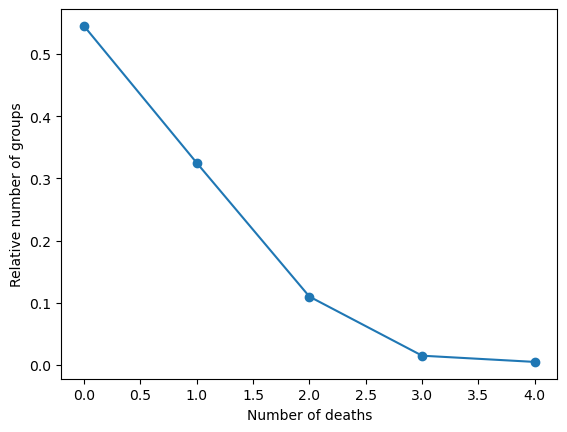

In [2]:
deaths = [0, 1, 2, 3, 4]
groups = [109, 65, 22, 3, 1]
probs = np.zeros(len(groups))
for i in range (len(groups)):
  probs[i] = groups[i]/200

plt.plot(deaths, probs, '-o')
plt.xlabel('Number of deaths')
plt.ylabel('Relative number of groups')
plt.show()

It looks like a Poissonian distribution. I compute the average of the deaths weighting by the relative number of groups and I fit a Poissonian distribution by hand.

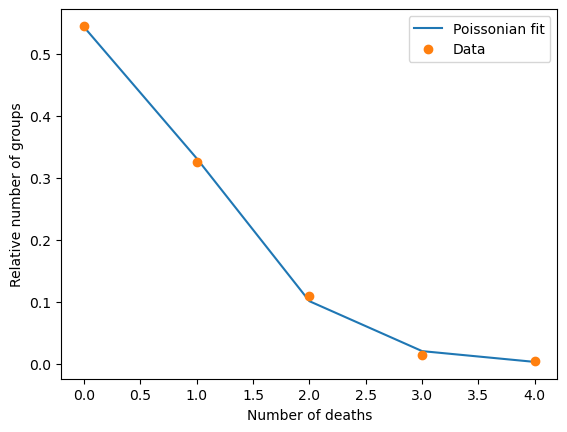

In [3]:
#fit with poissonian
from scipy.special import factorial
mean = np.average(deaths, weights=probs)

def poissonian (x, mu):
    return (mu**x)*np.exp(-mu)/factorial(x)

x_axis = np.arange(0, 5)
y_axis = []
for i in range(len(x_axis)):
    y_axis.append(poissonian(x_axis[i], mean))

plt.plot(x_axis, y_axis, label='Poissonian fit')
plt.plot(deaths, probs, 'o', label='Data')
plt.xlabel('Number of deaths')
plt.ylabel('Relative number of groups')
plt.legend()
plt.show()